# Sector 9

In [1]:
import numpy as np
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from astropy.table import Table
from tqdm import tqdm
pd.set_option('display.max_columns', None)
%matplotlib inline

file = pd.read_csv('s9tic.txt')
test_file = pd.read_csv('sector9tic.txt')

#tests
dummy = shuffle(test_file)
dummy = dummy.head(300000)

connection = mysql.connector.connect(user='ops',password='',host='ngtsdb',database='catalogues',
auth_plugin='mysql_native_password')

cur = connection.cursor(buffered=True)

cur.execute('SELECT * FROM tic8 LIMIT 13;')

In [2]:
new_data = test_file[test_file['TIC_ID'].isin(file['tic_id'])]
new_data = shuffle(new_data).head(10000)

----

## Functions

In [3]:
def read_data(file):
    data = pd.read_csv('file')

    
def get_tic(data):
    """
    data: the file 
    """
    sql_data = []
    connection = mysql.connector.connect(user='ops',password='',host='ngtsdb',database='catalogues',
                                         auth_plugin='mysql_native_password')
    
    df = pd.DataFrame([])
    for i in tqdm(data['TIC_ID']):
        
        cur = connection.cursor(buffered=True)
        cur.execute(f'SELECT * FROM tic8 WHERE tic_id={i};')
        columns = [j[0] for j in cur.description] # column headers of SQL data
        
        df1 = pd.DataFrame(cur.fetchall())
        df1.columns = columns
        df = pd.concat([df,df1],axis=0)
    df.reset_index(inplace=True)
       
    return df     

def HRDiagram(data,colour_index1,colour_index2,mag,M):
    """
    :data: the data containing TIC ID's
    :colour_index1: 
    :colour_index2:
    :mag: magnitude for HR diagram
    :M: absolute magnitude for HR Diagram
    
    """
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.scatter(data[colour_index1] - data[colour_index2],data[mag],marker='.',s=2.5)
    ax2.scatter(data[colour_index1] - data[colour_index2],M,marker='.',s=2.5)
    ax1.set_xlim([-4,4])
    colour_index1 = colour_index1.replace("mag","")
    colour_index2 = colour_index2.replace("mag","")
    ax1.set_xlabel(f'{colour_index1}-{colour_index2}')
    ax1.set_ylabel(f'{mag}')
    ax2.set_xlim([-4,4])
    ax2.set_xlabel(f'{colour_index1}-{colour_index2}')
    ax2.set_ylabel(f'Absolute {mag}')
    ax2.invert_yaxis()
    plt.subplots_adjust(bottom=0.1, right=2.5, top=0.9)
    plt.show()
    

def M(data,mag,parallax):
    """
    :data: dataset
    :mag: apparent magnitude
    :parallax: the parallax column from the dataset
    """
    return data[mag].astype(float) - (5 * np.log(data[parallax].astype(float)/10))

def mag_plot(data,mag,M):
    """
    data: dataset
    mag: magnitude to be visualised
    """
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.hist(data[mag],bins=150)
    ax1.set_xlabel(f'{mag}')
    ax1.set_ylabel('No. of Stars')
    ax2.hist(M,bins=50)
    ax2.set_xlabel(f'Absolute {mag}')
    ax2.set_ylabel('No. of Stars')
    plt.subplots_adjust(bottom=0.1, right=2.5, top=0.9)
    plt.show()
 

def colour_plot(data,colour_index1,colour_index2):
    """
    data:
    colour_index1:
    colour_index2:
    """
    plt.figure(figsize=(15,5))
    plt.hist(data[colour_index1] - data[colour_index2],color='blue',bins=150)
    colour_index1 = colour_index1.replace("mag","")
    colour_index2 = colour_index2.replace("mag","")
    plt.xlabel(f'{colour_index1}-{colour_index2}')
    plt.ylabel('No. of Stars')
    plt.xlim([-4,4])
    plt.show()

## Early Data Analysis

In [4]:
data = get_tic(dummy)

data['lumclass'] = data['lumclass'].fillna('no class')
data[['tic_id', 'ra_deg', 'dec_deg', 'pmRA', 'pmDEC', 'plx', 'e_plx', 'Bmag',
       'Vmag', 'Jmag', 'Kmag', 'gaiabp', 'gaiarp', 'GAIAmag', 'Tmag',
       'lumclass']]

100%|██████████| 300000/300000 [35:21:10<00:00,  2.36it/s]


,tic_id,ra_deg,dec_deg,pmRA,pmDEC,plx,e_plx,Bmag,Vmag,Jmag,Kmag,gaiabp,gaiarp,GAIAmag,Tmag,lumclass
0,38517451,62.938172,-62.994133,4.76692,15.6614,1.43111,0.020865,13.376,12.408,11.749,11.418,12.9632,12.2552,12.6883,12.3152,DWARF
1,302367626,133.244423,-67.448617,-7.65399,9.72103,0.582527,0.029131,16.178,15.394,14.275,13.935,15.6026,14.8062,15.2842,14.8664,DWARF
2,335500023,179.179895,-12.489034,0.598223,-18.1221,2.13082,0.029054,13.927,13.306,11.952,11.564,13.4209,12.5498,13.0628,12.6067,DWARF
3,444094282,147.213794,-55.092784,-0.10265,1.99091,0.60772,0.022011,None,14.176,13.212,12.759,14.3684,13.6922,14.1161,13.7933,DWARF
4,36376645,149.924060,-42.197453,-6.38948,-9.38609,2.22275,0.0382,16.99,16.049,13.85,12.992,16.4984,14.8582,15.7218,14.9161,DWARF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,3586384,139.544326,-37.974085,-5.87405,4.35804,0.174488,0.023052,14.748,12.991,10.149,9.125,13.4077,11.5422,12.4789,11.5700,GIANT
299996,140998018,78.349116,-76.577960,-0.272772,10.0011,1.50337,0.013501,14.911,14.213,12.718,12.255,14.3851,13.4133,13.9823,13.4757,DWARF
299997,238317056,120.491070,-49.072733,-3.3122,6.6069,0.396207,0.023792,15.806,15.19,13.737,13.328,15.2846,14.3685,14.9144,14.4366,DWARF
299998,149598791,86.881768,-64.465981,0.481428,8.03749,0.971159,0.021767,16.058,15.477,14.161,13.872,15.66,14.7669,15.2898,14.8228,DWARF


In [5]:
data.to_csv(f'sector9data_{len(data)}.csv')

## Exploring target properties 
Taken from parallax and photometry

- How many giant/dwarf stars are there?
- The distribution of main-sequence spectral types?
- How many stars are bright enough to include in the exocomet search?


#### B-V vs Tmag

B-V is colour index

Absolute magnitude: $M = m - 5log(d/10)$ 

In [5]:
Mag = data['Tmag'].astype(float) - (5 * np.log(data['d'].astype(float)/10))
M = M(data,'Tmag','d')

#### HR Diagrams

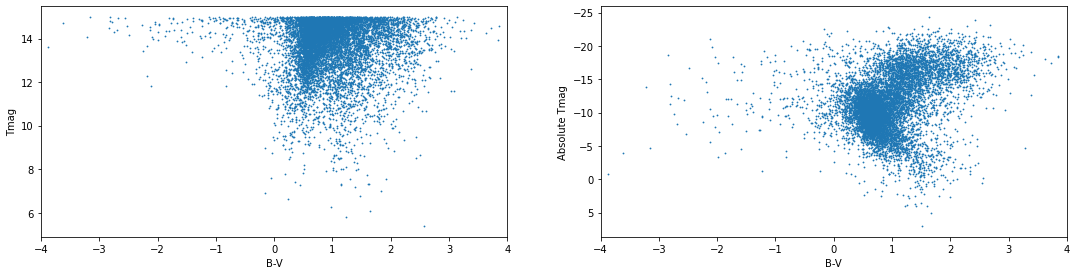

In [6]:
HRDiagram(data,'Bmag','Vmag','Tmag',M)

---

#### Histogram of Tmag

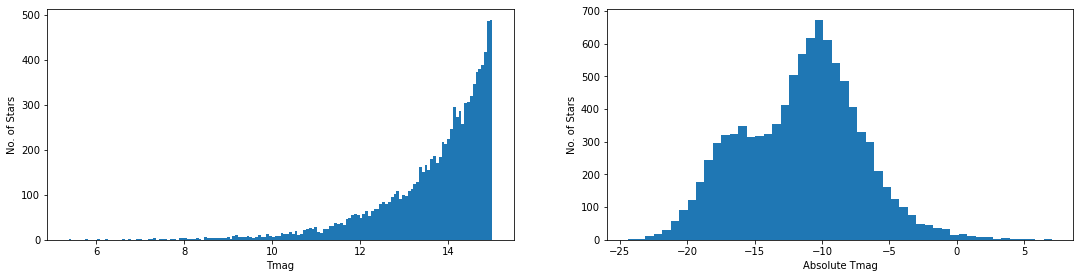

In [7]:
mag_plot(data,'Tmag',M)

Fraction of stars brighter than (?) mag.
Surprisingly low faint stars.

Check what stars have no values in mag, dist etc.

---

#### Histogram of B-V

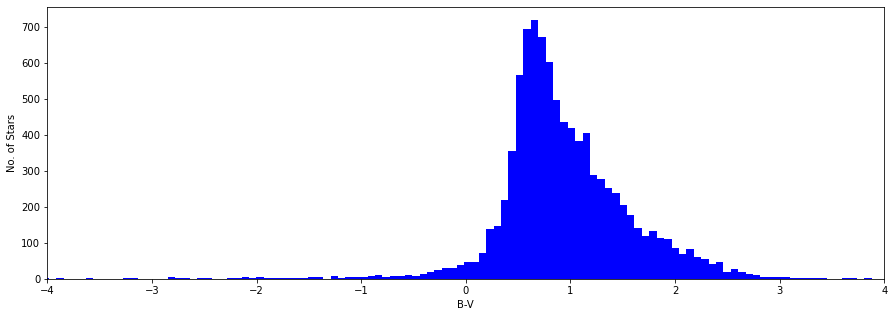

In [8]:
colour_plot(data,'Bmag','Vmag')

## Dwarf Stars

In [9]:
groups = data.groupby('lumclass').count()
groups

,index,tic_id,version,hip_id,tycho_id,ucac_id,2mass_id,sdss_id,allwise_id,gaia_id,apass_id,kic_id,objType,typeSrc,ra_deg,dec_deg,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,Tefflag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splits,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,htm10ID,htm13ID,htm16ID
lumclass,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DWARF,6042,6042,6042,9,331,5934,5970,58,5650,6005,4866,0,6042,6042,6042,6042,6042,6041,6041,6041,6041,6041,5740,5740,5740,6042,6042,6042,6042,5847,5844,6035,6035,58,58,58,58,58,58,58,58,58,58,5970,5940,5970,5951,5970,5932,5969,0,5649,5649,5649,5649,5649,3190,5649,414,6005,6005,6042,6041,6042,5960,5776,5743,5742,1188,135,135,5774,1189,5742,1188,5742,1188,5742,1188,5954,5735,5733,5624,1218,1218,0,0,1217,5624,5624,5704,995,995,996,996,995,995,995,995,995,995,5619,5619,5738,995,995,5776,6005,6005,6005,6005,6005,0,6035,5847,189,6042,6042,6042,6042,6042,6042,6013,6042,6042,6042,6042,6042
GIANT,3279,3279,3279,10,174,3130,3264,13,3191,3276,2044,0,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3230,3230,3230,3279,3279,3279,3279,3140,3140,3196,3196,13,13,13,13,13,13,13,13,13,13,3264,3260,3264,3256,3264,3252,3264,0,3190,3188,3190,3189,3190,2764,3190,681,3276,3276,3279,3279,3279,3231,3228,3228,0,0,85,85,3228,1,0,0,0,0,0,0,3232,3230,3228,3144,1,1,0,0,1,3144,3144,3227,0,0,1,1,0,0,0,0,0,0,3144,3144,3230,1,1,3228,3276,3276,3276,3276,3276,0,3196,3140,0,3279,3279,3279,3279,3279,3279,3276,3279,3279,3279,3279,3279
no class,679,679,679,5,41,472,569,0,462,576,306,0,679,659,679,679,679,464,464,464,464,464,458,458,458,679,679,679,679,473,467,558,558,0,0,0,0,0,0,0,0,0,0,569,520,569,514,569,522,549,0,462,444,462,444,462,283,459,134,576,576,679,673,679,505,121,121,0,0,0,0,0,0,0,0,0,0,0,0,523,458,443,443,1,1,46,3,1,443,443,442,0,0,0,0,0,0,0,0,0,0,458,458,458,1,1,121,531,576,530,576,527,0,558,473,0,659,659,659,659,659,659,527,679,679,679,679,679


In [12]:
dwarf_stars = data.loc[data['lumclass'] == 'DWARF']
MD = M(dwarf_stars,'Tmag','d')

#### HR Diagrams - Dwarf Stars

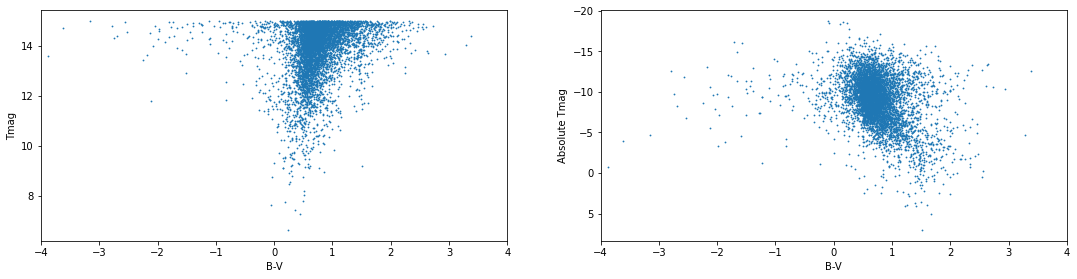

In [13]:
HRDiagram(dwarf_stars,'Bmag','Vmag','Tmag',MD)

#### B-V Histogram (Dwarf Stars)

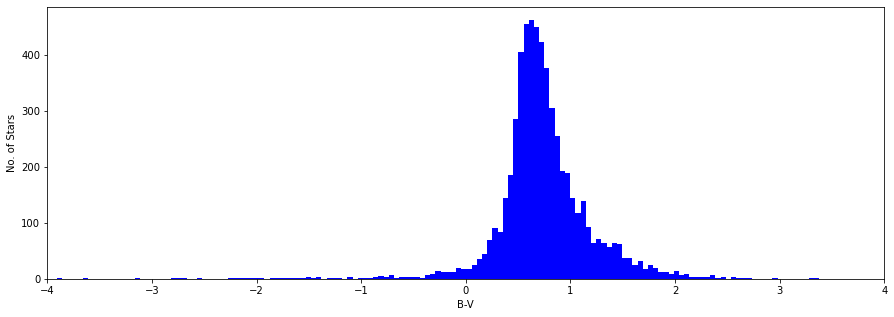

In [14]:
colour_plot(dwarf_stars,'Bmag','Vmag')

- **384 `None` values in classification (10k points). Dataset is good.**

In [15]:
data.groupby('lumclass').count()

,index,tic_id,version,hip_id,tycho_id,ucac_id,2mass_id,sdss_id,allwise_id,gaia_id,apass_id,kic_id,objType,typeSrc,ra_deg,dec_deg,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,Tefflag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splits,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,htm10ID,htm13ID,htm16ID
lumclass,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DWARF,6042,6042,6042,9,331,5934,5970,58,5650,6005,4866,0,6042,6042,6042,6042,6042,6041,6041,6041,6041,6041,5740,5740,5740,6042,6042,6042,6042,5847,5844,6035,6035,58,58,58,58,58,58,58,58,58,58,5970,5940,5970,5951,5970,5932,5969,0,5649,5649,5649,5649,5649,3190,5649,414,6005,6005,6042,6041,6042,5960,5776,5743,5742,1188,135,135,5774,1189,5742,1188,5742,1188,5742,1188,5954,5735,5733,5624,1218,1218,0,0,1217,5624,5624,5704,995,995,996,996,995,995,995,995,995,995,5619,5619,5738,995,995,5776,6005,6005,6005,6005,6005,0,6035,5847,189,6042,6042,6042,6042,6042,6042,6013,6042,6042,6042,6042,6042
GIANT,3279,3279,3279,10,174,3130,3264,13,3191,3276,2044,0,3279,3279,3279,3279,3279,3279,3279,3279,3279,3279,3230,3230,3230,3279,3279,3279,3279,3140,3140,3196,3196,13,13,13,13,13,13,13,13,13,13,3264,3260,3264,3256,3264,3252,3264,0,3190,3188,3190,3189,3190,2764,3190,681,3276,3276,3279,3279,3279,3231,3228,3228,0,0,85,85,3228,1,0,0,0,0,0,0,3232,3230,3228,3144,1,1,0,0,1,3144,3144,3227,0,0,1,1,0,0,0,0,0,0,3144,3144,3230,1,1,3228,3276,3276,3276,3276,3276,0,3196,3140,0,3279,3279,3279,3279,3279,3279,3276,3279,3279,3279,3279,3279
no class,679,679,679,5,41,472,569,0,462,576,306,0,679,659,679,679,679,464,464,464,464,464,458,458,458,679,679,679,679,473,467,558,558,0,0,0,0,0,0,0,0,0,0,569,520,569,514,569,522,549,0,462,444,462,444,462,283,459,134,576,576,679,673,679,505,121,121,0,0,0,0,0,0,0,0,0,0,0,0,523,458,443,443,1,1,46,3,1,443,443,442,0,0,0,0,0,0,0,0,0,0,458,458,458,1,1,121,531,576,530,576,527,0,558,473,0,659,659,659,659,659,659,527,679,679,679,679,679


## Giant Stars

In [16]:
giant_stars = data.loc[data['lumclass'] == 'GIANT']
MG = M(giant_stars,'Tmag','d')

#### HR Diagrams - Giant Stars

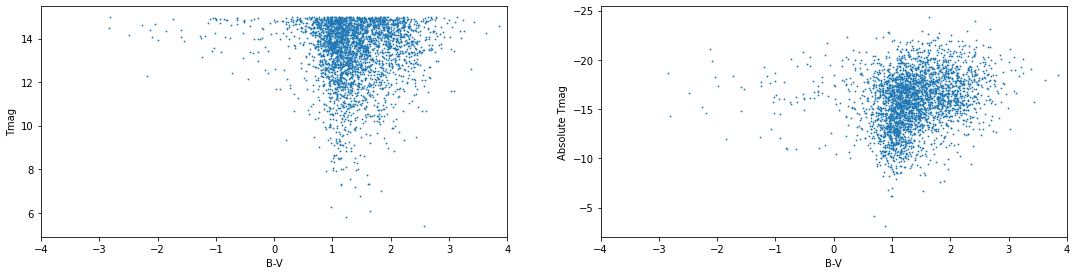

In [17]:
HRDiagram(giant_stars,'Bmag','Vmag','Tmag',MG)

#### B-V Histogram (Giant Stars)

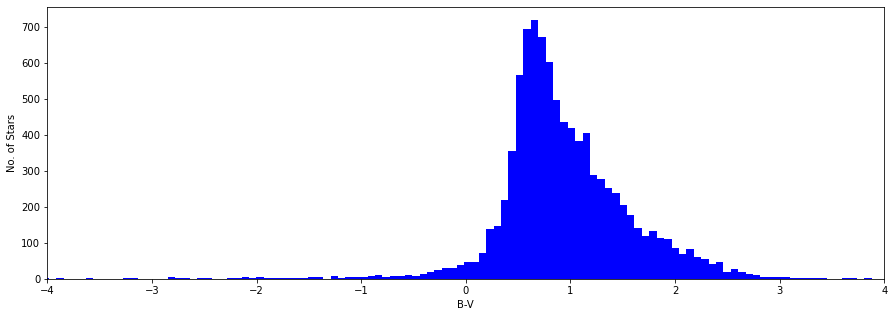

In [18]:
colour_plot(data,'Bmag','Vmag')

---

### **TMag > 12**

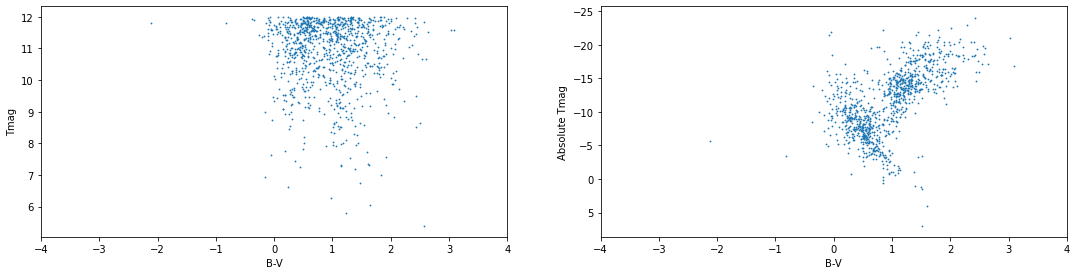

In [19]:
TMag12 = data.loc[data['Tmag'] >= 12.0]
M12 = M(TMag12,'Tmag','d')

HRDiagram(TMag12,'Bmag','Vmag','Tmag',M12)

### Cumulative Distributions

In [20]:
GIANT = data.loc[data['lumclass'] == 'GIANT','Tmag']
DWARF = data.loc[data['lumclass'] == 'DWARF','Tmag']
NONE = data.loc[data['lumclass'].isnull(),'Tmag']

/home/phrdhx/.conda/envs/hrdiags/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


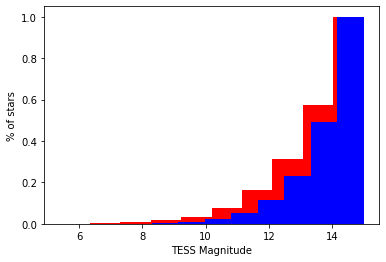

In [21]:
plt.hist(GIANT,color='red',density=True,cumulative=True)
plt.hist(NONE,color='black',density=True,cumulative=True)
plt.hist(DWARF,color='blue',density=True,cumulative=True)

plt.xlabel('TESS Magnitude')
plt.ylabel('% of stars')

plt.show()

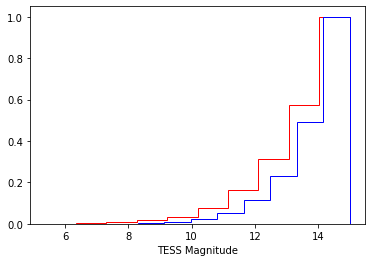

In [22]:
plt.hist(GIANT,color='red',cumulative=True,density=True,histtype='step')
#plt.hist(NONE,color='black',cumulative=True,density=True,histtype='step')
plt.hist(DWARF,color='blue',cumulative=True,density=True,histtype='step')

plt.xlabel('TESS Magnitude')
#plt.ylabel('Fraction > magnitude')
plt.show()

---

In [23]:
import seaborn as sns
import scipy

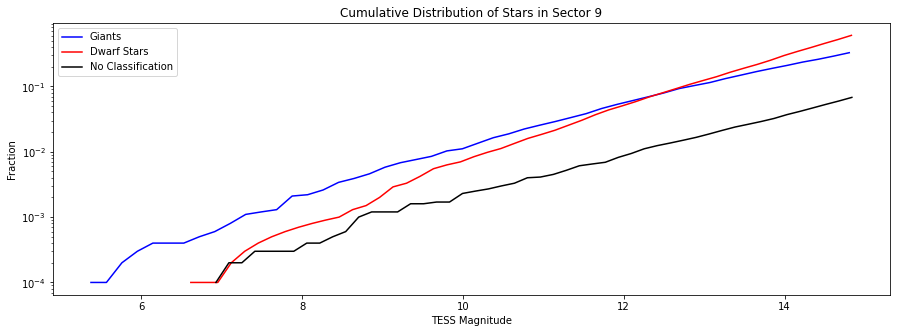

In [30]:
plt.figure(figsize=(15,5))
values,bins = np.histogram(data.loc[data['lumclass'] == 'GIANT','Tmag'],bins=50)
values2,bins2 = np.histogram(data.loc[data['lumclass'] == 'DWARF','Tmag'],bins=50)
values3,bins3 = np.histogram(data.loc[data['lumclass'] == 'no class','Tmag'],bins=50)
cumulative = np.cumsum(values) / len(data['Tmag'])
cumulative2 = np.cumsum(values2) / len(data['Tmag'])
cumulative3 = np.cumsum(values3) / len(data['Tmag'])
plt.plot(bins[:-1],cumulative,c='blue',label='Giants')
plt.plot(bins2[:-1],cumulative2,c='red',label='Dwarf Stars')
plt.plot(bins3[:-1],cumulative3,c='black',label='No Classification')
plt.xlabel('TESS Magnitude')
plt.ylabel('Fraction')
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Cumulative Distribution of Stars in Sector 9')
plt.legend(fontsize=10,loc=2)
plt.yscale('log')
plt.show()

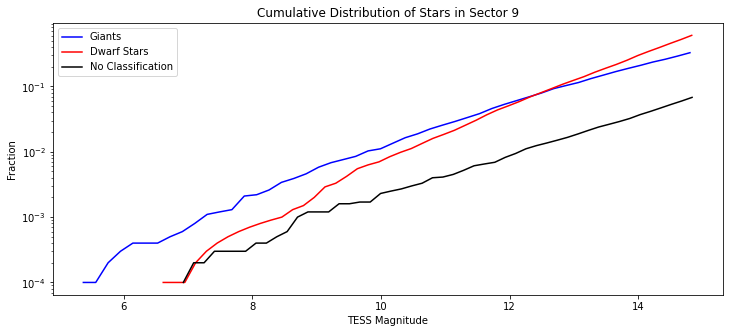

In [31]:
plt.figure(figsize=(12,5))
values,bins = np.histogram(data.loc[data['lumclass'] == 'GIANT','Tmag'],bins=50)
values2,bins2 = np.histogram(data.loc[data['lumclass'] == 'DWARF','Tmag'],bins=50)
values3,bins3 = np.histogram(data.loc[data['lumclass'] == 'no class','Tmag'],bins=50)
cumulative = np.cumsum(values) / len(data['Tmag'])
cumulative2 = np.cumsum(values2) / len(data['Tmag'])
cumulative3 = np.cumsum(values3) / len(data['Tmag'])
plt.plot(bins[:-1],cumulative,c='blue',label='Giants')
plt.plot(bins2[:-1],cumulative2,c='red',label='Dwarf Stars')
plt.plot(bins3[:-1],cumulative3,c='black',label='No Classification')
plt.xlabel('TESS Magnitude')
plt.ylabel('Fraction')
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Cumulative Distribution of Stars in Sector 9')
plt.legend(fontsize=10,loc=2)
plt.yscale('log')
plt.show()

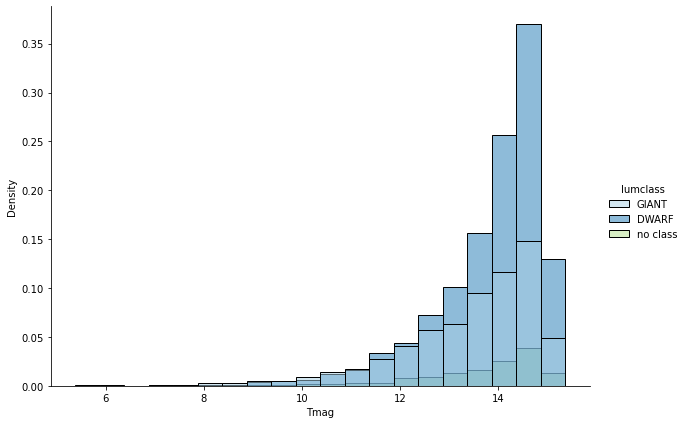

In [25]:
sns.displot(data,x='Tmag',binwidth=0.5,hue='lumclass',palette='Paired',height=6, aspect=11.7/8.27,stat='density')
plt.show()

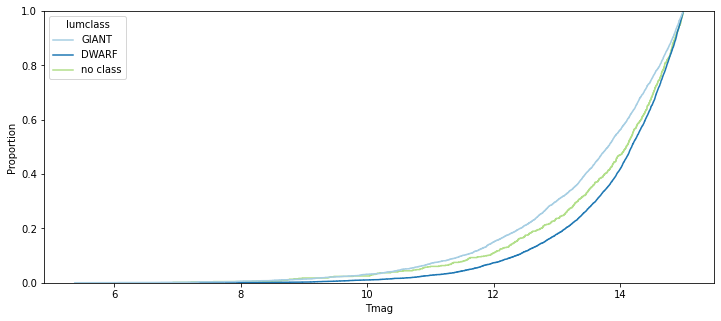

In [26]:
plt.figure(figsize=(12,5))
sns.ecdfplot(data,x='Tmag',label='data',hue='lumclass',palette='Paired')
plt.show()

More dwarf stars beyond 14th magnitude
Giant stars 13th mag.

In [27]:
giant_13 = data.loc[data['lumclass'] == 'GIANT','Tmag']
giant_13 = giant_13.loc[giant_13 <= 13.0]
dwarf_13 = data.loc[data['lumclass'] == 'DWARF','Tmag']
dwarf_13 = dwarf_13.loc[dwarf_13 <= 13.0]
no_class_13 = data.loc[data['lumclass'] == 'no class','Tmag']
no_class_13 = no_class_13.loc[no_class_13 <= 13.0]

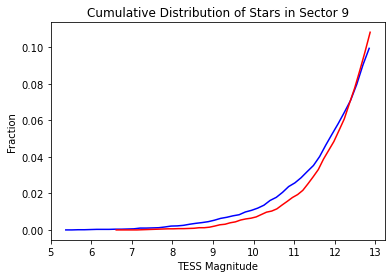

In [28]:
values_13,bins_13 = np.histogram(giant_13,bins=50)
values2_13,bins2_13 = np.histogram(dwarf_13,bins=50)
values3_13,bins3_13 = np.histogram(dwarf_13,bins=50)
cumulative_13 = np.cumsum(values_13) / len(data['Tmag'])
cumulative2_13 = np.cumsum(values2_13) / len(data['Tmag'])
cumulative3_13 = np.cumsum(values3_13) / len(data['Tmag'])
plt.plot(bins_13[:-1],cumulative_13,c='blue')
plt.plot(bins2_13[:-1],cumulative2_13,c='red')
#plt.plot(bins3_13[:-1],cumulative3_13,c='black')
plt.xlabel('TESS Magnitude')
plt.ylabel('Fraction')
plt.title('Cumulative Distribution of Stars in Sector 9')
plt.show()

In [29]:
data.loc[data['Tmag'] <= 10.0]

,index,tic_id,version,hip_id,tycho_id,ucac_id,2mass_id,sdss_id,allwise_id,gaia_id,apass_id,kic_id,objType,typeSrc,ra_deg,dec_deg,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,Tefflag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splits,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,htm10ID,htm13ID,htm16ID
130,0,334694707,20190415,None,5497-00052-1,387-054839,10290104-1243156,None,J102901.00-124315.5,3754253045400903552,6050493,None,STAR,tmgaia2,157.254316,-12.721011,tmgaia2,-49.3596,0.135463,6.80278,0.211253,gaia2,3.91328,0.079378,gaia2,257.408,37.259900,163.972,-20.6131,10.971,0.09,10.044,0.007,None,None,None,None,None,None,None,None,None,None,8.566,0.021,8.098,0.044,7.98,0.033,AAA-111-111-000-0-0,None,7.897,0.026,7.992,0.02,7.946,0.019,7.893,0.23,9.90772,0.000453,9.34293,0.0061,rered,gaia2,5143.0,122.0,None,None,None,None,3.12911,None,None,None,None,None,GIANT,None,None,253.806,5.1545,0.038316,0.013879,None,None,None,None,None,0.015717,0.012042,panstarrs,None,None,None,None,None,None,None,None,None,None,5.052,5.257,bj2018,None,None,dered,10.3949,0.001676,9.29785,0.00133,1,None,tycho2v3,tycho2b3,None,2.11408,3.27589,157.254098,-12.720981,0.076965,0.098065,0,0,716734653,10212182,653579692,41829100310
150,0,30911541,20190415,None,None,211-032907,08591049-4754389,None,J085910.50-475439.3,5330027858557476864,22660708,None,STAR,tmgaia2,134.793679,-47.910871,tmgaia2,-4.73286,0.12766,4.79106,0.123547,gaia2,0.716773,0.076351,gaia2,268.252,-1.309140,163.351,-60.4674,14.705,0.018,12.211,0.023,None,None,None,None,None,None,None,None,None,None,6.128,0.018,4.985,0.046,4.499,0.016,AAA-111-111-000-0-0,None,4.277,0.348,3.995,0.165,4.241,0.014,4.048,0.032,10.0664,0.001681,8.64660,0.0074,rered,gaia2,3002.0,122.0,None,None,None,None,None,None,None,None,None,None,no class,None,None,1352.39,146.565,0.155955,0.014859,None,None,None,None,None,0.013499,0.016218,schlegel,None,None,None,None,None,None,None,None,None,None,131.21,161.92,bj2018,None,None,dered,12.4084,0.006004,8.71177,0.002548,1,None,ucac4,apassdr9,None,2.16616,1.91605,134.793649,-47.91085,0.063119,0.063952,-1,0,660804808,10439687,668140024,42760961594
160,0,307212111,20190415,None,9197-01786-1,103-024524,08181669-6935350,None,J081816.70-693534.9,5270094888475923840,32023332,None,STAR,tmgaia2,124.569623,-69.593081,tmgaia2,-1.20498,0.037773,6.65925,0.048267,gaia2,2.87001,0.022579,gaia2,282.992,-18.214400,208.937,-76.9341,11.004,0.079,10.391,0.005,None,None,None,None,None,None,None,None,None,None,9.237,0.023,8.959,0.022,8.869,0.019,AAA-222-111-000-0-0,None,8.837,0.023,8.863,0.02,8.83,0.021,8.62,0.15,10.1946,0.000534,9.78070,0.006,rered,gaia2,6193.0,127.033,3.69479,0.081169,None,None,2.56691,0.110759,1.19,0.165397,0.070358,0.015235,DWARF,8.73213,0.377492,344.978,2.7075,0.072222,0.009599,246,0.108618,None,None,0.001787,0.008981,0.010216,schlegel,0.10628,0.224514,0.142945,0.078572,0.013086,0.017383,0.068767,0.093571,0.316593,0.438391,2.687,2.728,bj2018,131.592,122.473,dered,10.5251,0.000872,9.73658,0.000963,1,None,tycho2v3,tycho2b3,None,0.713212,0.748553,124.569608,-69.593052,0.018634,0.024952,1,0,635186993,9917617,634727501,40622560123
162,0,464729611,20190415,51246,8609-01110-1,165-046192,10280285-5711545,None,J102802.83-571154.5,5351748435901721600,27859477,None,STAR,tmgaia2,157.011907,-57.198461,tmgaia2,-11.2238,0.093325,2.14723,0.083886,gaia2,3.63595,